# Guide to accessing and reviewing the bendit results

Potentially, a lot of data can be generated when the demo pipeline is run, and steps were taken to make handling all that as easy as possible. However, accessing that collected data may not be obvious to the uninitiated. This notebook covers what the 'realistic' pipeline [here](index.ipynb) produces and how to access it. Furthermore, it touches on how to use Jupyter/Python to conveniently view and further process all the data.

The hope is this covers what is necessary to use the generated output. Therefore, if you just plugged your sequences into the demo pipeline, you should be able to follow along to get the bendIt results for all you data. If you are looking to adapt the pipeline, this notebook will give you a flavor of the types of output you may wish to gather or not include your adapted bendIt pipeline.

## Accessing the bendIt results: Starting up an active session

If you already have an active Jupyter session going, you can skip this step.

However, if you have a previously saved result from the demo pipeline and you are now returning to it and looking to access the contents of the archive, the best way to get started is to start a session by going [here](https://github.com/fomightez/bendit-binder) and clicking on the `launch bend.it` badge. When the session starts, select the `Accessing_and_reviewing_the_bendit_results.ipynb` notebook from the navigation panel at the right and work through the steps below this.

The uncompressing step below should work on an unix-style command line. However, some of the advanced steps under the section entitled 'Using Python to review the data or customize the plots' involve modules/packages that aren't necessarily in a standard Python installation. By running in the recommended environment as directed above, the code is more likely to work without hiccups.

## Accessing the bendIt results: Uncompress the Archive

This notebook assumes, you just ran the pipeline and are trying to access the results. There is then a number of files in the current directory beside the archive. To make things easier, I am going to suggest making a new directory with a simple name and then you could drag the archive into that folder and work there. To make things match witih the demo, I am going to write out those steps as commands, too. Feel free to run the cells or to do it by hand. If you make a different 'unpack' directory, you'll need to adjust things below accordingly.

The exclamation marks in front of the shell commands, tells Jupyter to run those commands as shell commands and not Python.

In [2]:
!mkdir unpack
!mv bendit_analysis*.tar.gz unpack/

To make things in this notebook work, you'll need to switch the current working directory over to where we are going to unpack the archive. We'll use the Jupyter magic command `%cd` to change the working directory for all subsequent cells in the notebook. If we just used `!cd`, it would only change the directory for that cell.

In [3]:
%cd unpack

/home/jovyan/unpack


Note you can check anytime what is the current working directory with `pwd`. (Note most shell commands need an exclamation point but a few were added in to Jupyter so they work without it and `pwd` is one.) Also of note, is that this location is completely independent of where the file navigation pane on the left side of this window may be showing.

In [4]:
pwd

'/home/jovyan/unpack'

To **unpack the archive**, we'll run the command in the following cell.  
You need to edit the command so it will extract your file. In other words, the part after the `xzf` has to be changed to match the actual file name of the archive you are working with in particular.

(Note that I am keeping this untarring step as generic as possible so that it would work as written on any unix-style command line without the exclamation point.)

In [5]:
!tar xzf bendit_analysisFeb2120202027.tar.gz

If you ran the above cell and saw anything like `tar (child): bendit_analysisZZZZZZ.tar.gz: Cannot open: No such file or directory`, it simply means you had the file name wrong. You'll need to edit it and run the cell again.

If things worked, you should just see the asterisk to the left of the cell turn to a number. If you changed the file navigation pane on the left-side of this browser window over to the 'unpack' directory, after a moment you should see more files show up in the file pane. Don't worry if you didn't switch. We are going to explore the contents using commands next anyways.

## Overview of the Unpacked Items

If all is correct and you used the `%cd` command to previously switch to the 'unpack directory, running the next cell will show the contents of the current working directory so we can begin to explore the contents of the-now-unpacked archive.

In [6]:
ls -lh

total 1.3M
-rw-r--r-- 1 jovyan root  11K Feb 21 20:27 A_output.png
-rw-r--r-- 1 jovyan root 365K Feb 21 20:28 bendit_analysisFeb2120202027.tar.gz
-rw-r--r-- 1 jovyan root  10K Feb 21 20:27 B_output.png
-rw-r--r-- 1 jovyan root 3.1K Feb 21 20:27 demo_A.pkl
-rw-r--r-- 1 jovyan root  38K Feb 21 20:27 demo_A.png
-rw-r--r-- 1 jovyan root  43K Feb 21 20:27 demo_A.svg
-rw-r--r-- 1 jovyan root 1.6K Feb 21 20:27 demo_A.tsv
-rw-r--r-- 1 jovyan root 3.1K Feb 21 20:27 demo_B.pkl
-rw-r--r-- 1 jovyan root  38K Feb 21 20:27 demo_B.png
-rw-r--r-- 1 jovyan root  44K Feb 21 20:27 demo_B.svg
-rw-r--r-- 1 jovyan root 1.6K Feb 21 20:27 demo_B.tsv
-rw-r--r-- 1 jovyan root 1.3K Feb 21 20:27 demo_cassettesGC.pkl
-rw-r--r-- 1 jovyan root  171 Feb 21 20:27 demo_cassettesGC.tsv
-rw-r--r-- 1 jovyan root 1.1K Feb 21 20:27 demo_mergedGC.pkl
-rw-r--r-- 1 jovyan root  115 Feb 21 20:27 demo_mergedGC.tsv
-rw-r--r-- 1 jovyan root   65 Feb 21 20:14 demo_sample_set.fa
-rw-r--r-- 1 jovyan root 5.3K Feb 21 20:27 LOG_baFeb21

That lists out the contents of the directory. The options added along with the `ls` command make the output more redable by showing. In particular, the `h` in `-lh` means the file sizes are human readable and the `l` in `-lh` says to list the details in long form and not just the names.

You'll see there is much more than the compressed archive that was originally added when we made the directory just a few cells back. These are the results of the bendIt run. The following section will go through what these are and how to use them.

----

## About the Contents

If you used your own data, your results will be different but the types will be the same.  I am going describe the contents as if you ran the demo sequences; however, mostly you just need to pay attention to the file extensions, or sometimes the start of the name, to tell which file types correspond.

After a brief overview, I am going to add some details about most of the types.

Typical contents overview:

- Log file
- Image files for the plots
- a notebook for reviewing all the plots en masse
- serialized (pickeled) bendIt data 
- bendIt data as tabular text
- Nucleotide composition detail
- serialized processing information and results on a per sample basis
- input files
- raw gnuplots


### Log file

The Log file will look something like `LOG_ba<MONTH>ZZZZZZZZZ.txt` with the `<MONTH>` showing the abbreviation for the month and the `ZZZZZZZZ` portion being derived from a time date stamp.

This contains much of what was shown as the demo pipeline ran with some additional details from the actualy bendIt job(s) for each sequence.

At the end is a summary.

### Image files for the plots

The plots have been saved a two forms of images. The first part of the name of each is derived from the sample_set name and the individual sample name. The two extensions delineate them:

- `.png`  
Examples from the demo input `demo_A.png` and `demo_B.png`.   
This is a raster/bitmap file format made of pixels that you are probably familair with. While it is great for viewing easily as a lot of software, including JupyterLab, can handle it, please see the note below suggesting `.svg` for scaling up, or the Python section that discusess making individual plots larger and making new image files in `.png` format from that.

- `.svg`  
Examples from the demo input `demo_A.svg` and `demo_B.svg`.    
This indicates SVG (scalable vector grpahics) file format. SVG is really the best choice for scaling up or adapting further as it offers the most control and no less of resolution. Sugggest using Adobe Illustrator or Inkscape for scaling and customizing. This is what you'll want to use if you don't want to remake the plot and are looking to customize it for publication. Any modern browser can view `.svg` files, and fortunately an SVG viewer is built right into JupyterLab. 

### Notebook for reviewing all the plots en masse

The file name for this file will resemble `plots4review_from-ba<MONTH>ZZZZZZZZ.ipynb` with the time data stamp matching the arhive file name and log file name.

The image files dsicussed above are nice but not that easy to view unless you bring them local and use your file browser. Alternatively, you can browser them right in the session by opening this notebook and then opening subsequent views of it. (**ADD MORE DETAILS ON HOW TO OPEN MULTIPLE VIEW AND ADD IMAGE EXAMPLE**)

At the top of this notebook, I emphasized you'll want to be in an active notebook session for working with the output. One of the main reasons is that it offers a standard environment where the archive can be unpacked easily and Jupyter offers nice viewers for many of the data types. This is the case for the 'Review' notebook. The plots are already part of the notebook and so nothing has be run again, but a Jupyter environment is useful for viewing it. Alternatively, nbviewer can be used to view a 'static' from of the notebook if you don't mind placing the notebook file somewhere [the online nbviewer](https://nbviewer.jupyter.org/) can be pointed at it. Note the static form will look much like it does in Jupyter but you cannot modify or run any cells, or modify the text content further.

Note that the sample names on the plots should look like the original input sample names but might not match sample names seen in the 'serialized processing information and results on a per sample basis' file, `seqs_dfs_and_plots_for_each_set.pkl`. This is because certain characters can an issue with the processing steps and were eliminated from the sample names for processing. In the plot representations, efforts were made to substitute back in names matching a pattern used by a user.

### Serialized (pickled) bendIt data

This will resemble files looking like `demo_A.pkl`.

The data plotted from tbe bendIt analysis is stored in a compressed form that can easily be read back in as a Pandas dataframe for convenient use in the Jupyter environment or further analysis. Acessing these Pandas dataframes in the Jupter environment will be discussed below as part of the 'Using Python to review the data or customize the plots' section.

### bendIt data as tabular text

This will resemble files looking like `demo_A.tsv`.

The data plotted from tbe bendIt analysis is stored in a tab-delimited tabular text form that can easily be used anywhere, even in Excel. Jupyter allows easy viewing of these as well. You can click on the 'frame' symbol next to the file name in the file navigto panel on the left, and they'll open as full-featured spreadsheet-like views. If you right click, and select `Open with ...` > `editor`, you can see the text form that underlies it.


### Nucleotide composition detail

These files will look like sample set names followed by `_cassettesGC.pkl` and `_cassettesGC.tsv` for the cassette sequences and  sample set names followed by `_mergedGC.pkl` and `_mergedGC.tsv for the sequences of the combined cassette sequences merged with the defined flanking sequences. 

The examples from the demonstration data are:

- `demo_cassettesGC.pkl`
- `demo_cassettesGC.tsv`
- `demo_mergedGC.pkl`
- `demo_mergedGC.tsv`

These provide a breakdown of nucleotide composition and %G+C for every cassette sequence. In the serilaized (pickeled) data, it is dataframe with each sample as a row. In the tabular text data, it is a tab-separated file with each sample as a row. The rank of %G+C from lowest to highest is the final column.

Similar data is provided for every merged sequence where cassette flanked by the defined sequences.

Accessing the tabular text is similar to what is described under 'bendIt data as tabular text'.

Accessing the serialized Pandas dataframes in the Jupter environemnt will be discussed below as part of the 'Using Python to review the data or customize the plots' section.

The source dataframes are also included in the 'serialized processing information and results on a per sample basis' file, `seqs_dfs_and_plots_for_each_set.pkl`.

### Serialized processing information and results on a per sample basis

This file will be named `seqs_dfs_and_plots_for_each_set.pkl`.

This is almost all the input sequences and output stored on a per sample set and per sample basis using Pyton dictionaries. This is mainly meant for advanced use. It actually gets used in the top of the `Notebook for reviewing all the plots en masse` to render all the plots. It will be used to access the dataframes as well as an example below. Really beyond being used to easily render all the plots, it is really just there to have it in case something not collected here is necessary or needs to be checked. 

In the `seqs_dfs_and_plots_for_each_set.pkl`, there is a value for each sample set. That value is a list of dictionaries. The order of the list dictionaries for each sample set is as follows:

- cassette sequences processed keyed on name
- sequences of the cassette sequences merged to the defined flanking sequences processed keyed on name
- breakdown of nucleotide composition and %G+C for every cassette sequence (dataframe with each sample as a row)
- breakdown of nucleotide composition and %G+C for every merged sequence where cassette flanked by the defined sequences (dataframe with each sample as a row)
- dataframes produced by bendIt analysis & used to make the plots keyed by sample
- plots produced from each dataframe keyed by sample

As the information is stored serialized (pickled), it has to be unpickled first. The following code can be used to do unpickle and bring it into an active Jupyter notebook namespace:

```python
import pickle
with open("seqs_dfs_and_plots_for_each_set.pkl", "rb") as f:
    seqs_dfs_and_plots_per_sample_set = pickle.load(f)
```

You'll note that this code gets used in the notebook for reviewing the plots en masse as it is from this source that the plots were added to the review notebook.

### Input files

The sequence files of the cassette sequences were stored in FASTA format in the archive as well in order to provide a more an intact artifact of all stages of the run.

As they are in FASTA format, they'll most likely end in `.fa` or `.fasta`.

The input files may also exist in sanitized and unsanitized form if the sample names included characters that would have caused issues in the processing steps.

### Raw gnuplots

These files will look like sample names followed by `_output.png`.

The raw gnuplots made by bendIt for each sample were saved. Overall these should resemble the plots generated for each cassette merged into the flanking sequences analyzed and are only meant for verification of that and troubleshooting. Keep in mind that for short sequences, the right side of the gnuplot will not represent the correct form as extra sequences were added to avoid a segmentation fault when bendIt was run.

----

## Using Python to review the data or customize the plots

A number of options readily exist for using and further processing the unpacked data. This section illustrates some of those. A good portion at the end focuses on accessing the data in the 'serialized processing information and results on a per sample basis' file, `seqs_dfs_and_plots_for_each_set.pkl`. That portion is probably best considered 'advanced' as it requires more understanding of Python syntax to fully understand what is going. Most of the other examples only require name changes to get to data.

### Viewing dataframes for the plotted data

While JupyterLab adds big improvements for viewing the CSVs/TSVs derived from (or which can be the source of) such dataframes, viewing and handling the dataframes within Jupyter is going to come up. Jupyter is particularly good at rendering Pandas dataframes nicely. 

This section will describe accessing the serialized (pickled) bendIt data in files looking like `demo_A.pkl`. This is mainly to serves as an introduction to illustrate the process and handling dataframes. 

If you are looking to use the bendIt data that is actually plotted elsewhere, you'd probably want what is described above as 'bendIt data as tabular text' which is in the files looking like `demo_A.tsv`. Where there sample set and sample names are in te file. The dataframe form is nice if you are continuing on with using Python to examine.

Let's illustrate viewing a dataframe in Jupyter by bringing the serialized form in.

It would be fairly easy to bring in the TSV form to a dataframe as well, but the serialized just needs to be read in at this point.

As the command shows in the next cell, we can just put the file name of the serialized dataframe in a command like `df = df.read_pickle('demo_A.pkl')` where you'd replace `demo_A.pkl` with your file name of interest.

In [7]:
import pandas as pd
df = pd.read_pickle('demo_A.pkl')

To view a representation of the dataframe, we can call it now since we defined it as `df` above:

In [8]:
df

,Position,Sequence,Predicted_curvature,Bendability
0,3,a,0.0000,0.0633
1,4,a,0.0000,1.3522
2,5,a,0.0000,3.9733
3,6,c,8.9765,6.1887
4,7,g,9.2796,6.2942
...,...,...,...,...
76,79,a,6.8233,5.9429
77,80,g,0.0000,6.8829
78,81,c,0.0000,6.8913
79,82,t,0.0000,6.1950


We could just look at the top.

In [17]:
df.head()

,Position,Sequence,Predicted_curvature,Bendability
0,3,a,0.0000,0.0633
1,4,a,0.0000,1.3522
2,5,a,0.0000,3.9733
3,6,c,8.9765,6.1887
4,7,g,9.2796,6.2942


Or look at the end:

In [18]:
df.tail()

,Position,Sequence,Predicted_curvature,Bendability
76,79,a,6.8233,5.9429
77,80,g,0.0000,6.8829
78,81,c,0.0000,6.8913
79,82,t,0.0000,6.1950
80,83,g,0.0000,0.0000


Or easily view an overview of the data contents.

In [19]:
df.describe()

,Position,Predicted_curvature,Bendability
count,81.000000,81.000000,81.000000
mean,43.000000,3.651504,5.332964
std,23.526581,2.100518,1.584404
min,3.000000,0.000000,0.000000
25%,23.000000,2.476700,4.875700
50%,43.000000,3.351800,5.416200
75%,63.000000,4.963900,6.195000
max,83.000000,9.279600,9.082300


I include a more detailed introduction to dataframes [here](https://nbviewer.jupyter.org/github/fomightez/blast-binder/blob/master/notebooks/BLAST%20on%20Command%20Line%20and%20Integrating%20with%20Python.ipynb#Demonstrating-the-Utility-of-Having-the-BLAST-Results-in-Python) and [here](https://nbviewer.jupyter.org/github/fomightez/ptmbr-accompmatz/blob/master/notebooks/PatMatch%20with%20Python%20basics.ipynb#Demonstrating-the-Utility-of-Having-the-PatMatch-Data-in-Python).

### Adjusting the plots via Python

If you are looking to scale or edit just a few of the plots, I suggest you use the `.svg` file with the images as scaleable vector graphics.

However, maybe you used the `for_review` setting previously and want to generate images from the plots now or you want to make the plots larger. This section will illustrate accessing the contents in the 'serialized processing information and results on a per sample basis' file, `seqs_dfs_and_plots_for_each_set.pkl` to bring the plots back into the session here so image files can be saved or the image dimensions altered.

The next cell unpickles the `seqs_dfs_and_plots_for_each_set.pkl` as described under the 'Serialized processing information and results on a per sample basis' section.

In [4]:
import pickle
with open("seqs_dfs_and_plots_for_each_set.pkl", "rb") as f:
    seqs_dfs_and_plots_per_sample_set = pickle.load(f)

The sample set is the first key in this collection. That is `demo` for the demonstration sequence file.

As described under the section 'Serialized processing information and results on a per sample basis', the plots are the last item in the serialized collection. As the last item it can be accessed using a special shortcut to indicate the last item ,`-1`. And so to access the plot collection for the demo set the code is:

In [16]:
seqs_dfs_and_plots_per_sample_set['demo'][-1]

{'A': <Figure size 576x288 with 1 Axes>,
 'B': <Figure size 576x288 with 1 Axes>}

The crytic code, `<Figure size 576x288 with 1 Axes>`, after each sample name identifies a Python object. In this case a figure of particular size.

Normally we could call one of them with the following to display it:

In [19]:
seqs_dfs_and_plots_per_sample_set['demo'][-1]['A']

<Figure size 576x288 with 1 Axes>

However, it it will be represented by Python object code and not a display of the plot. While it might some convoluted, the issue is that the canvas that Jupyter would display here was lost when the underlying data associated with it was serialized in the source notebook. We can make a 'dummy' canvas and swap in the underlying plot data, see [here](https://gist.github.com/demisjohn/883295cdba36acbb71e4#gistcomment-3177271).

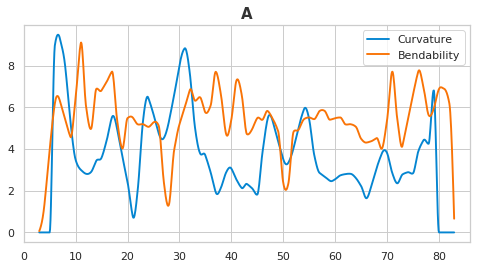

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def make_manager(fig):
    # create a dummy figure and use its
    # manager to display "fig"  ; based on https://stackoverflow.com/a/54579616/8508004
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

plot_a = seqs_dfs_and_plots_per_sample_set['demo'][-1]['A']
make_manager(plot_a)
plot_a.show()

We can now refer to it from this point on as `plot_a`.

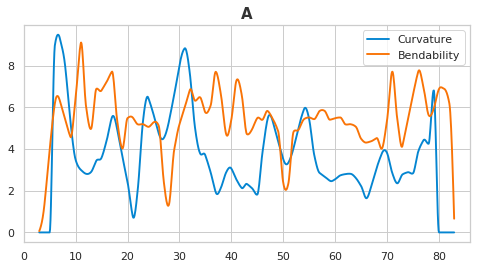

In [8]:
plot_a

Using that reference we can now save it just as any matplotlib/seaborn plot.

In [16]:
plot_a.savefig("znew_image_saved.svg")

You can go to the file navigator at the left and double-click `znew_image_saved.svgznew_image_saved.svg` down at the bottom of the file list to view it.

Or run the code in the next cell to see it here.

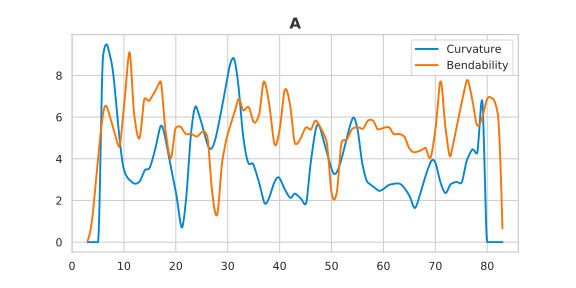

In [11]:
from IPython.core.display import SVG
SVG(filename='znew_image_saved.svg')

What if we wanted to adjust size. The next cell does this on a exaggerated scale just to illustrate.

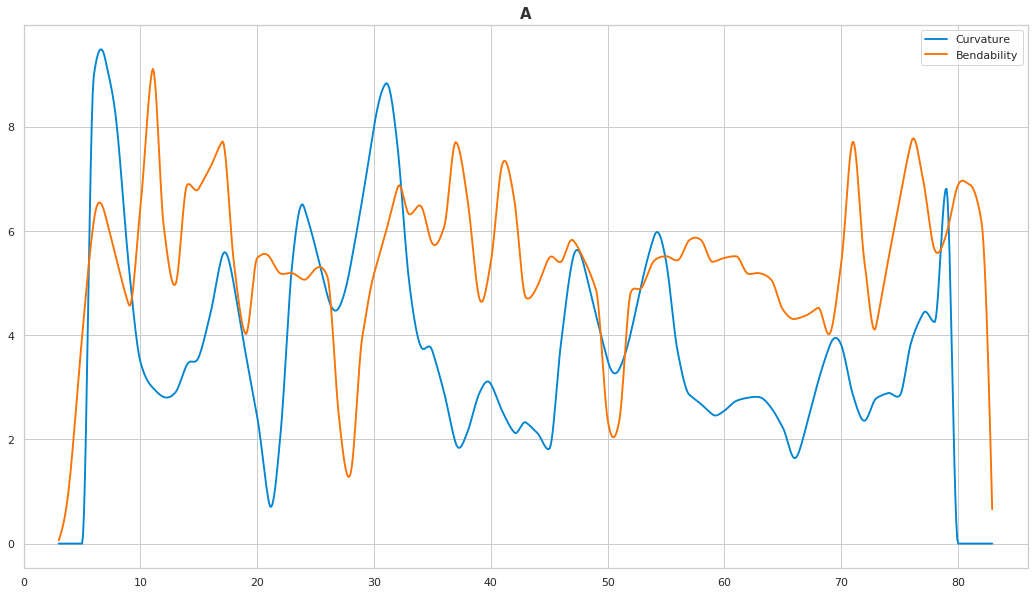

In [21]:
plot_a.set_size_inches((18, 10))
plot_a

In fact, in JupyterLab it won't be readily apparent just how large it is. You'll need to double-click on it to open it at 100% scale.

You'll note though that the lines didn't scale. The blue and the orange plots of the data are the same thickness as when the plot was smaller and now seem anemic. This is one of the reasons I suggest using a vector graphics handling-capable image editing software like Inkscape or Adobe Illustrator to scale up the `.svg` files if you need larger images of the plots. You can then easily scale all parts in proportion. To do this using Python is possible. For example, to make the blue and orane lines less anemic: 

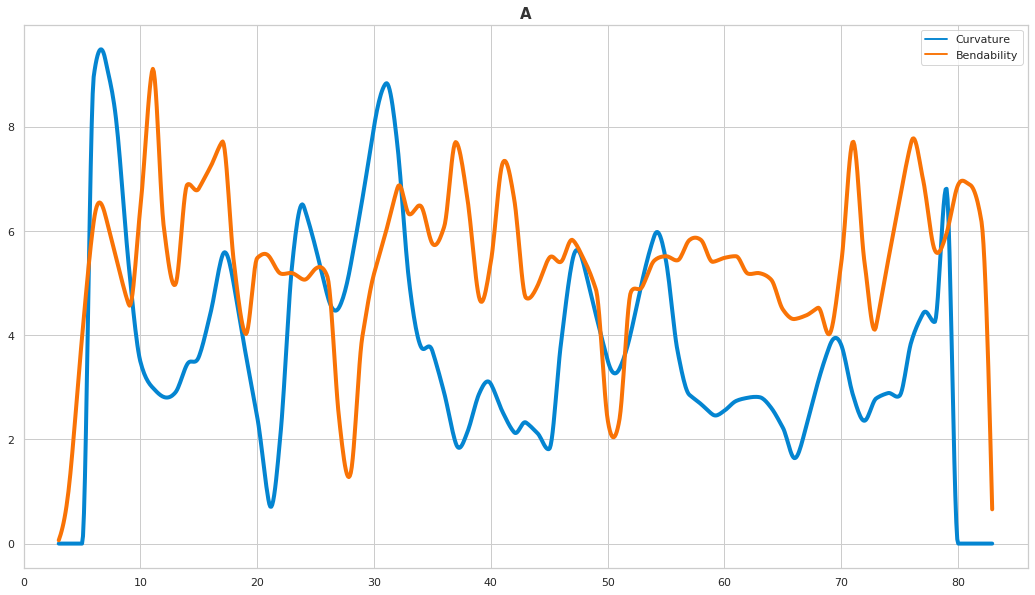

In [46]:
#scale linewidth up based on https://stackoverflow.com/a/48547567/8508004
lines = plot_a.axes[0].lines #getting axes from a figure based on https://stackoverflow.com/a/24107230/8508004 ;
# note that it is a list of them and what we want is in the first
for line in lines:
    line.set_linewidth(4)
plot_a

However, then you would probably also want to scale the tick labels, the title, the legend, etc.. And at this point you'd probably have an easier time of going back to the data that is being plotted and plot the many you need at a larger size or dimension. Or scale the SVG [by using a command line tool](http://www.imagemagick.org/discourse-server/viewtopic.php?t=23979).

In [ ]:
fig.savefig('zhigh_dpi.png', dpi=600)

### Accessing the nucleotide composition/%G+C information via Python

Run the unpickling process if not done already.

In [ ]:
import pickle
with open("seqs_dfs_and_plots_for_each_set.pkl", "rb") as f:
    seqs_dfs_and_plots_per_sample_set = pickle.load(f)

Here is the third element in the serialized collection, which is a  dataframe with the breakdown of nucleotide composition and %G+C for every cassette sequence. Each sample is a row.

In [14]:
seqs_dfs_and_plots_per_sample_set['demo'][2]

,seq,A,C,T,G,Total_nts,%G+C,rank_on_GC
A,ACCTGCGATGACTGACTCCCCTTTAGAGG,6,9,7,7,29,0.551724,2.0
B,AGGAGCTAGACTTTAGGACTATAGCTCTC,8,6,8,7,29,0.448276,1.0


Here is the fourthelement in the serialized collection, which is a  dataframe with the breakdown of nucleotide composition and %G+C for every sequence where the cassette sequence has been merged with the defined flanking sequenes. Each sample is a row.

In [15]:
seqs_dfs_and_plots_per_sample_set['demo'][3]

,G,T,A,C,Total_nts,%G+C,rank_on_GC
A,25,19,22,20,86,0.523256,2.0
B,25,20,24,17,86,0.488372,1.0


(Include in Python section that discusess making individual plots larger and making new image files in `.png` format from that. Though recommend `svg` as better.)

Show how to make the plots again? <=== so maybe make a utility script that is just the plotting part? <=== better way to modularize since could still change plotting?

in addition to the direct pickled dataframes, show how to get to the ones keyed on sample set and samples as well as a further illustration of the use of `seqs_dfs_and_plots_for_each_set.pkl`

In [ ]:
import time

def executeSomething():
    #code here
    print ('.')
    time.sleep(480) #60 seconds times 8 minutes

while True:
    executeSomething()

.
.
